<a href="https://colab.research.google.com/github/hideaki-kyutech/softcomp2024/blob/main/gym_control2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 制御対象（Cartpole-v1）

## Google ColaboratoryでOpenAI gymを使うための環境設定

In [1]:
!apt update && apt install xvfb # xvfb(X11の仮想ディスプレイ)
!pip install gym-notebook-wrapper # ColabでGymの描画機能を利用するライブラリ

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Get:13 http://security.ubunt

## 各種ライブラリのインポート

In [2]:
import gnwrapper
import gym # OpenAI-gym
import numpy as np
import matplotlib.pyplot as plt

## 変数の説明

- `observation[0]`: Cart Position
- `observation[1]`: Cart Velocity
- `observation[2]`: Pole Angle
- `observation[3]`: Pole Angular Velocity

- `reward`: 棒が立っている状態をキープしているとき 1

- 終了条件(`done=1`となる条件)
 1. Pole Angle が$\pm 12$&deg;以上となった時
 2. Cart Positionが$\pm 2.4$以上となった時
 3. 継続ステップ数が500以上になった時

- `env.action_space.sample()`: 0または1をランダムに出力（0=カートを左に移動、1=カートを右に移動）

## Cartpoleの操作量（右：+1 or 左：0）をランダムで決定した時（ランダム制御時）の挙動を確認する（500 time steps）

In [3]:
env = gnwrapper.LoopAnimation(gym.make('CartPole-v1')) # Xvfbが起動される
# https://gymnasium.farama.org/environments/classic_control/

observation = env.reset() # 環境の初期化
sum_reward = 0
max_reward = 0

pos_hist = []
vpos_hist = []
ang_hist = []
vang_hist =[]
force_hist = []

for i in range(500):
    force = env.action_space.sample() #乱数で 0 または +1 を決定
    observation, reward, done, info = env.step(force) # random action
    sum_reward += reward
    pos_hist.append(observation[0])
    vpos_hist.append(observation[1])
    ang_hist.append(observation[2])
    vang_hist.append(observation[3])
    env.render() # ここで、描画データを保存する
    if done:
        observation = env.reset()
        print(f"The stick fell down at {i+1}th step.")
        print(f"The total reward is {sum_reward}")
        if max_reward < sum_reward:
          max_reward = sum_reward
        sum_reward = 0

env.display() # ここで、保存した描画データをアニメーションとして表示する
print(f"The max reward is {max_reward}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environme

The stick fell down at 18th step.
The total reward is 18.0
The stick fell down at 52th step.
The total reward is 34.0
The stick fell down at 109th step.
The total reward is 57.0
The stick fell down at 131th step.
The total reward is 22.0
The stick fell down at 141th step.
The total reward is 10.0
The stick fell down at 178th step.
The total reward is 37.0
The stick fell down at 210th step.
The total reward is 32.0
The stick fell down at 227th step.
The total reward is 17.0
The stick fell down at 247th step.
The total reward is 20.0
The stick fell down at 257th step.
The total reward is 10.0
The stick fell down at 273th step.
The total reward is 16.0
The stick fell down at 309th step.
The total reward is 36.0
The stick fell down at 327th step.
The total reward is 18.0
The stick fell down at 354th step.
The total reward is 27.0
The stick fell down at 367th step.
The total reward is 13.0
The stick fell down at 380th step.
The total reward is 13.0
The stick fell down at 394th step.
The tot

The max reward is 57.0


## ランダム制御時のカートの位置の履歴を表示して、累積絶対誤差を計算

30.074045865854714


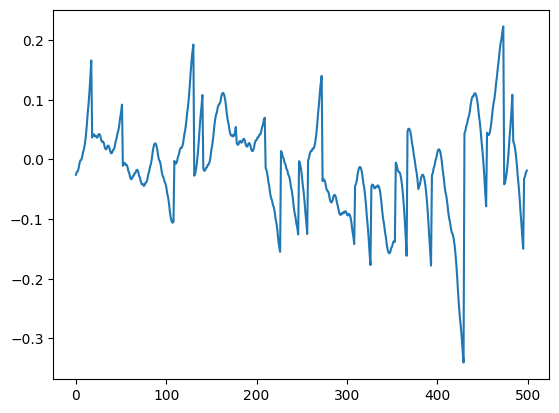

In [4]:
plt.plot(np.array(pos_hist))
print(sum(abs(np.array(pos_hist))))

## ランダム制御時のカートの速度の履歴を表示して、累積絶対誤差を計算

215.20477940305136


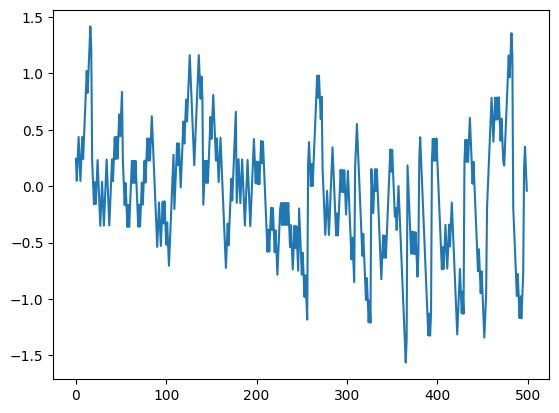

In [5]:
plt.plot(np.array(vpos_hist))
print(sum(abs(np.array(vpos_hist))))

## ランダム制御時のポールの角度の履歴を表示して、累積絶対誤差を計算

39.71973660035292


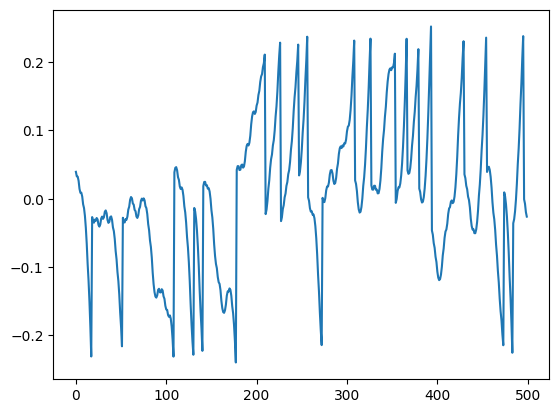

In [6]:
plt.plot(np.array(ang_hist))
print(sum(abs(np.array(ang_hist))))

## ランダム制御時のポールの角速度の履歴を表示して、累積絶対誤差を計算

335.8182955982629


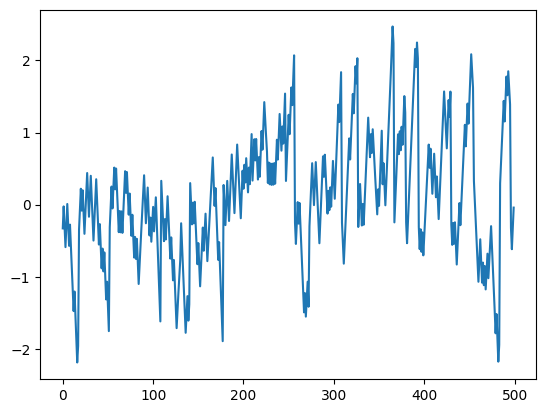

In [7]:
plt.plot(np.array(vang_hist))
print(sum(abs(np.array(vang_hist))))